In [22]:
import tensorflow as tf
print(tf.__version__)

tf.random.set_seed(42)

import numpy as np
import h5py as h5
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn import metrics

2.3.0


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AHYJ8b0KKee3JbQxx3TodYXhXH6Cjr-h6t4S4GUmy-iHx0yeusRhgI
Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/ColabNotebooks/NNDL/'
os.chdir(os.path.dirname(os.path.abspath(path)))

print(os.getcwd())

/content/drive/My Drive/ColabNotebooks


In [4]:
f = h5.File("NNDL/SVHN_single_grey1-2.h5", "r")
# Get and print list of datasets within the H5 file
datasetNames = [n for n in f.keys()]
for n in datasetNames:
  print(n)

X_test
X_train
X_val
y_test
y_train
y_val


In [5]:
X_test = f['X_test']
X_train = f['X_train']
X_val = f['X_val']
y_test = f['y_test']
y_train = f['y_train']
y_val = f['y_val']

In [6]:
X_train.shape

(42000, 32, 32)

number is:  4


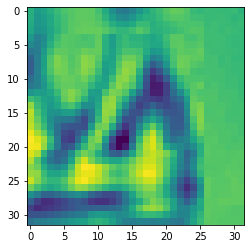

In [7]:
#vizualizing one of the image
imgplot = plt.imshow(X_train[3])
print('number is: ',y_train[3])

In [8]:
#hot encoding
number_of_class = len(np.unique(y_train))
print(number_of_class)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=number_of_class)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=number_of_class)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=number_of_class)

10


In [9]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [10]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(200, activation='relu'))

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(100, activation='relu'))

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(100, activation='relu'))


# Normalize the data
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(number_of_class, activation='softmax'))

In [11]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 200)               205000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               4

In [13]:
model.fit(np.array(X_train), np.array(y_train), validation_data=(np.array(X_test), np.array(y_test)), epochs = 200, batch_size = 64) 

Epoch 1/200
657/657 [==============================] - 5s 8ms/step - loss: 2.4374 - accuracy: 0.2224 - val_loss: 1.4974 - val_accuracy: 0.5390
Epoch 2/200
657/657 [==============================] - 5s 8ms/step - loss: 1.6915 - accuracy: 0.4242 - val_loss: 1.2437 - val_accuracy: 0.6257
Epoch 3/200
657/657 [==============================] - 5s 8ms/step - loss: 1.4614 - accuracy: 0.5121 - val_loss: 1.0765 - val_accuracy: 0.6813
Epoch 4/200
657/657 [==============================] - 5s 8ms/step - loss: 1.3384 - accuracy: 0.5628 - val_loss: 1.0272 - val_accuracy: 0.6880
Epoch 5/200
657/657 [==============================] - 5s 8ms/step - loss: 1.2511 - accuracy: 0.5966 - val_loss: 0.9448 - val_accuracy: 0.7166
Epoch 6/200
657/657 [==============================] - 5s 8ms/step - loss: 1.1892 - accuracy: 0.6205 - val_loss: 0.9773 - val_accuracy: 0.6996
Epoch 7/200
657/657 [==============================] - 5s 8ms/step - loss: 1.1299 - accuracy: 0.6410 - val_loss: 0.8149 - val_accuracy: 0.7567

In [14]:
# evaluate model
model.evaluate(X_test,y_test)

563/563 [==============================] - 2s 3ms/step - loss: 0.4126 - accuracy: 0.8765


[0.41260457038879395, 0.8765000104904175]

In [24]:
pred = np.round(model.predict(X_test))

In [25]:
y_class = np.argmax(pred, axis = 1) 
y_check = np.argmax(y_test, axis = 1) 

cmatrix = confusion_matrix(y_check, y_class)
print(cmatrix)

[[1730   12    1    3   13    1   17    8    8   21]
 [ 166 1566    8    8   37    2    2   27    8    4]
 [ 132   15 1530   22   18   11    1   39   12   23]
 [ 177   11    9 1365   12   77   10   15   29   14]
 [ 126   29   11   11 1588    4   10    5    7   21]
 [ 125    9    3   44    9 1505   40    3   18   12]
 [ 156    8    7    8   19   47 1537    9   35    6]
 [ 109   39   16   12    9    5    5 1600    6    7]
 [ 195   15    9   19    8   10   51    4 1471   30]
 [ 184   18   10   16   16   22    5   10   20 1503]]


In [26]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1814
           1       0.91      0.86      0.88      1828
           2       0.95      0.85      0.90      1803
           3       0.91      0.79      0.85      1719
           4       0.92      0.88      0.90      1812
           5       0.89      0.85      0.87      1768
           6       0.92      0.84      0.88      1832
           7       0.93      0.88      0.91      1808
           8       0.91      0.81      0.86      1812
           9       0.92      0.83      0.87      1804

   micro avg       0.92      0.85      0.88     18000
   macro avg       0.92      0.85      0.88     18000
weighted avg       0.92      0.85      0.88     18000
 samples avg       0.85      0.85      0.85     18000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
